# Import des librairies et fichiers


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

J'ai trouvé 4 BDD sur la FAO utile pour ce projet : 
- La disponibilité alimentaire en viande de volailles en 2017 et 2021
- Le PIB et le PIB/ habitant entre 2017 et 2022
- La population entre 2017 et 2022
- La stabilité politique des pays entre 2017 et 2023

Nous commençons par importer les tables pour les étudier

In [2]:
Dispo_Alim = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%209/BDD/Disponibilit%C3%A9%20alimentaire%202017-2021.csv', sep =',')
Population = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%209/BDD/population%202017-2021.csv', sep =',')
Pib = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%209/BDD/PIB%202017-2022.csv', sep =',')
Stab_Politique = pd.read_csv('file:///C:/Users/boisj/Documents/Formation%20Openclassroom/Projet%209/BDD/stabilit%C3%A9%20politique%202017-2023.csv', sep =',')

# Description et simplification des fichiers

## Description des fichiers

In [3]:
#Nous cherchons à créer une fonction qui nous permet de rapidement voir les : uniques, nan, le count, la fréquence, le min, le max, la moyenne, le nombre de ligne et de colonnes et le type

def describe_df(df):
    
    description=pd.DataFrame()
    description['dtype'] = df.dtypes
    description['missing_values'] = df.isnull().sum()
    description['unique_values'] = df.nunique()
    description['count']=df.count()
    description['min']=df.select_dtypes(include='number').min()
    description['max']=df.select_dtypes(include='number').max()
    description['moy']=round(df.select_dtypes(include='number').mean(),2)
    description['q1']=df.select_dtypes(include='number').quantile(0.25)
    description['med']=df.select_dtypes(include='number').quantile(0.5)
    description['q3']=df.select_dtypes(include='number').quantile(0.75)
    nb_nan=df.isnull().sum().sum()

    print('Notre jeu de données comporte ' + str(df.shape[0]) + ' lignes'+ ' et ' +str(df.shape[1]) + ' colonnes')
    print('Il y a ' + str(df.duplicated().sum()) + ' doublons')
    print('Il y a ' + str(nb_nan) + ' valeurs nulles soit ' + str(round(nb_nan/(df.shape[0]*df.shape[1])*100,2)) + ' %')
    
    display(description)
    
    if df.duplicated().sum() >0:
        print('les lignes en doubles sont :')
        display(df.loc[df.duplicated()==True].head())
    display(df.head())


In [4]:
for i in [Population,Dispo_Alim,Pib, Stab_Politique]:
        display(describe_df(i))



Notre jeu de données comporte 1175 lignes et 15 colonnes
Il y a 0 doublons
Il y a 1175 valeurs nulles soit 6.67 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
Code Domaine,object,0,1,1175,NaN,NaN,NaN,NaN,NaN,NaN
Domaine,object,0,1,1175,NaN,NaN,NaN,NaN,NaN,NaN
Code zone (M49),int64,0,235,1175,4.000,894.000,435.88,218.0000,438.00,654.0000
Zone,object,0,235,1175,NaN,NaN,NaN,NaN,NaN,NaN
Code Élément,int64,0,1,1175,511.000,511.000,511.00,511.0000,511.00,511.0000
Élément,object,0,1,1175,NaN,NaN,NaN,NaN,NaN,NaN
Code Produit,int64,0,1,1175,3010.000,3010.000,3010.00,3010.0000,3010.00,3010.0000
Produit,object,0,1,1175,NaN,NaN,NaN,NaN,NaN,NaN
Code année,int64,0,5,1175,2017.000,2021.000,2019.00,2018.0000,2019.00,2020.0000
Année,int64,0,5,1175,2017.000,2021.000,2019.00,2018.0000,2019.00,2020.0000


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,36686.784,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,37769.499,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,38972.230,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,40099.462,X,Ciffre de sources internationales,NaN


None

Notre jeu de données comporte 13396 lignes et 14 colonnes
Il y a 0 doublons
Il y a 0 valeurs nulles soit 0.0 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
Code Domaine,object,0,1,13396,NaN,NaN,NaN,NaN,NaN,NaN
Domaine,object,0,1,13396,NaN,NaN,NaN,NaN,NaN,NaN
Code zone (M49),int64,0,186,13396,4.0,894.00,425.54,204.0,418.00,642.000
Zone,object,0,186,13396,NaN,NaN,NaN,NaN,NaN,NaN
Code Élément,int64,0,18,13396,645.0,5911.00,3101.78,671.0,5072.00,5301.000
Élément,object,0,18,13396,NaN,NaN,NaN,NaN,NaN,NaN
Code Produit (FBS),object,0,1,13396,NaN,NaN,NaN,NaN,NaN,NaN
Produit,object,0,1,13396,NaN,NaN,NaN,NaN,NaN,NaN
Code année,int64,0,5,13396,2017.0,2021.00,2019.01,2018.0,2019.00,2020.000
Année,int64,0,5,13396,2017.0,2021.00,2019.01,2018.0,2019.00,2020.000


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2018,2018,Milliers de tonnes,29.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2019,2019,Milliers de tonnes,28.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2020,2020,Milliers de tonnes,28.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2021,2021,Milliers de tonnes,28.0,I,Valeur imputée


None

Notre jeu de données comporte 2528 lignes et 15 colonnes
Il y a 0 doublons
Il y a 2528 valeurs nulles soit 6.67 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
Code Domaine,object,0,1,2528,NaN,NaN,NaN,NaN,NaN,NaN
Domaine,object,0,1,2528,NaN,NaN,NaN,NaN,NaN,NaN
Code zone (M49),int64,0,211,2528,4.000000,8.940000e+02,428.83,208.000000,430.000000,642.250000
Zone,object,0,211,2528,NaN,NaN,NaN,NaN,NaN,NaN
Code Élément,int64,0,2,2528,6110.000000,6.119000e+03,6114.50,6110.000000,6114.500000,6119.000000
Élément,object,0,2,2528,NaN,NaN,NaN,NaN,NaN,NaN
Code Produit,int64,0,1,2528,22008.000000,2.200800e+04,22008.00,22008.000000,22008.000000,22008.000000
Produit,object,0,1,2528,NaN,NaN,NaN,NaN,NaN,NaN
Code année,int64,0,6,2528,2017.000000,2.022000e+03,2019.50,2018.000000,2019.000000,2021.000000
Année,int64,0,6,2528,2017.000000,2.022000e+03,2019.50,2018.000000,2019.000000,2021.000000


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2018,2018,Millions d’USD,18418.848300,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,502.056771,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,Millions d’USD,18904.490263,X,Ciffre de sources internationales,NaN


None

Notre jeu de données comporte 980 lignes et 15 colonnes
Il y a 0 doublons
Il y a 980 valeurs nulles soit 6.67 %


,dtype,missing_values,unique_values,count,min,max,moy,q1,med,q3
Code Domaine,object,0,1,980,NaN,NaN,NaN,NaN,NaN,NaN
Domaine,object,0,1,980,NaN,NaN,NaN,NaN,NaN,NaN
Code zone (M49),int64,0,196,980,4.00,894.00,428.26,211.00,424.000,643.75
Zone,object,0,196,980,NaN,NaN,NaN,NaN,NaN,NaN
Code Élément,int64,0,1,980,6125.00,6125.00,6125.00,6125.00,6125.000,6125.00
Élément,object,0,1,980,NaN,NaN,NaN,NaN,NaN,NaN
Code Produit,int64,0,1,980,21032.00,21032.00,21032.00,21032.00,21032.000,21032.00
Produit,object,0,1,980,NaN,NaN,NaN,NaN,NaN,NaN
Code année,int64,0,5,980,2017.00,2021.00,2019.00,2018.00,2019.000,2020.00
Année,int64,0,5,980,2017.00,2021.00,2019.00,2018.00,2019.000,2020.00


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,0.85,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2019,2019,indice,0.85,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.86,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2021,2021,indice,0.92,X,Ciffre de sources internationales,NaN


None

In [5]:
print('Dans la table Population il y a ' ,len(Population['Zone'].unique()) , 'pays')
print('Dans la table Disponibilité alimentaire il y a ' ,len(Dispo_Alim['Zone'].unique()) , 'pays')
print('Dans la table PIB il y a ', len(Pib['Zone'].unique()) , 'pays')
print('Dans la table Stab_Politique il y a ', len(Stab_Politique['Zone'].unique()), 'pays')

Dans la table Population il y a  235 pays
Dans la table Disponibilité alimentaire il y a  186 pays
Dans la table PIB il y a  211 pays
Dans la table Stab_Politique il y a  196 pays


In [6]:
Dispo_Alim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (t)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (t)', 'Pertes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

## Simplification des fichiers

Remarques : 
- Le nombre de colonnes et le nom des variables sont les mêmes (hormis pour la dispo alimentaire qui n'a pas la variable 'note' et la variable 'code produit' est différente)
- Il n'y a pas de null dans nos tables
- Les années couvertes sont principalement 2017-2021. Nous supprimons l'année 2022 dans la table PIB.
- Nous avons un nombre de pays différents selon les tables. La table disponibilité alimentaire sera pris en référence lors des jointures
- Bcp d'éléments inutile dans la table dispo alimentaire. Nous gardons uniquement la dispo intérieure, la production et l'importation


In [7]:
# Suppression de l'année 2022 dans la table PIB
Pib=Pib.loc[Pib['Année']<2022]
#On garde uniquement les éléments intéressants dans la table Dispo alimentaire
Dispo_Alim=Dispo_Alim.loc[Dispo_Alim['Élément'].isin(['Production','Importations - Quantité','Disponibilité intérieure'])]

#Suppression des colonnes en trop dans les tables
Col_a_supp1=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Code année','Code Produit','Produit', 'Symbole', 'Description du Symbole','Note']
Col_a_supp2=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Code année', 'Symbole','Code Produit (FBS)','Produit', 'Description du Symbole']

for j in [Population, Pib, Stab_Politique]:
    j.drop(columns=Col_a_supp1,inplace=True)

Dispo_Alim.drop(columns=Col_a_supp2,inplace=True)


# Préparation des données

## Pivot

Nous allons pivoter chacune des tables.

In [8]:
Population=Population.pivot_table(index={'Zone'}, columns=['Élément','Année'], values='Valeur').reset_index()
Dispo_Alim=Dispo_Alim.pivot_table(index={'Zone'}, columns=['Élément','Année'], values='Valeur').reset_index()
Pib=Pib.pivot_table(index={'Zone'}, columns=['Élément','Année'], values='Valeur').reset_index()
Stab_Politique=Stab_Politique.pivot_table(index={'Zone'}, columns=['Élément','Année'], values='Valeur').reset_index()

In [9]:
#On cherche à savoir si le pivot à créer des valeurs null
for i in [Population,Dispo_Alim,Pib, Stab_Politique]:
        display(describe_df(i))

(235, 6)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


dtype  missing_values  unique_values  count  \
Élément           Année                                                  
Zone                      object               0            235    235   
Population totale 2017   float64               0            235    235   
                  2018   float64               0            235    235   
                  2019   float64               0            235    235   
                  2020   float64               0            235    235   
                  2021   float64               0            235    235   

                                 min                    max           moy  
Élément           Année                                                    
Zone                     Afghanistan  Îles Wallis-et-Futuna           NaN  
Population totale 2017         0.547            1442041.109  38467.943166  
                  2018         0.537            1448928.199  38854.641736  
                  2019         0.528            1453801.543  39220.835387  
                  2020          0.52            1456928.486  39557.615128  
                  2021         0.511            1457934.562  39852.744749

(186, 16)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


dtype  missing_values  unique_values  count  \
Élément                  Année                                                  
Zone                             object               0            186    186   
Disponibilité intérieure 2017   float64               6            139    180   
                         2018   float64               6            142    180   
                         2019   float64               0            138    186   
                         2020   float64               0            147    186   
                         2021   float64               0            151    186   
Importations - Quantité  2017   float64               7             91    179   
                         2018   float64               6             90    180   
                         2019   float64               0             94    186   
                         2020   float64               0             92    186   
                         2021   float64               0            101    186   
Production               2017   float64               8            126    178   
                         2018   float64               8            127    178   
                         2019   float64               2            127    184   
                         2020   float64               2            131    184   
                         2021   float64               2            128    184   

                                        min           max         moy  
Élément                  Année                                         
Zone                            Afghanistan  Îles Salomon         NaN  
Disponibilité intérieure 2017           2.0       18670.0  757.638889  
                         2018           2.0       20675.0  795.722222  
                         2019           1.0       22155.0  812.456989  
                         2020           1.0       25298.0  852.989247  
                         2021           1.0       25657.0  865.865591  
Importations - Quantité  2017           0.0        1554.0   94.759777  
                         2018           0.0        1575.0   97.450000  
                         2019           0.0        1814.0   99.516129  
                         2020           0.0        2396.0  103.177419  
                         2021           0.0        2075.0  104.881720  
Production               2017           0.0       21914.0  803.960674  
                         2018           0.0       22298.0  837.741573  
                         2019           0.0       22878.0  837.929348  
                         2020           0.0       24405.0  876.125000  
                         2021           0.0       24618.0  882.880435

(211, 11)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


dtype  missing_values  unique_values  count  \
Élément                  Année                                                  
Zone                             object               0            211    211   
Valeur US $              2017   float64               0            211    211   
                         2018   float64               0            211    211   
                         2019   float64               0            211    211   
                         2020   float64               0            211    211   
                         2021   float64               0            211    211   
Valeur US $ par habitant 2017   float64               0            211    211   
                         2018   float64               0            211    211   
                         2019   float64               0            211    211   
                         2020   float64               0            211    211   
                         2021   float64               0            211    211   

                                        min                        max  \
Élément                  Année                                           
Zone                            Afghanistan  Îles Vierges britanniques   
Valeur US $              2017     45.295753                 19477337.0   
                         2018     48.042003                 20533058.0   
                         2019     54.153386                 21380976.0   
                         2020     51.751958                 21060474.0   
                         2021     60.170178                 23315081.0   
Valeur US $ par habitant 2017    295.620936              173611.814797   
                         2018    288.626394              194288.624162   
                         2019     283.66987              199383.567142   
                         2020    291.679074              182537.304601   
                         2021    301.586433              234317.084818   

                                          moy  
Élément                  Année                 
Zone                                      NaN  
Valeur US $              2017   443182.027339  
                         2018   475338.589116  
                         2019   482500.813904  
                         2020   472475.379761  
                         2021   540508.163850  
Valeur US $ par habitant 2017    16889.862489  
                         2018    17913.548238  
                         2019    17772.307040  
                         2020    16442.201699  
                         2021    18558.104066

(196, 6)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


dtype  missing_values  unique_values  count          min  \
Élément Année                                                               
Zone            object               0            196    196  Afghanistan   
Valeur  2017   float64               0            146    196        -2.94   
        2018   float64               0            154    196        -3.01   
        2019   float64               0            150    196        -2.77   
        2020   float64               0            142    196        -2.71   
        2021   float64               0            145    196        -2.68   

                        max       moy  
Élément Année                          
Zone           Îles Salomon       NaN  
Valeur  2017           1.92 -0.066480  
        2018           1.93 -0.072296  
        2019           1.88 -0.078469  
        2020           1.91 -0.076735  
        2021           1.88 -0.074235

## Nettoyage

### valeurs null dispo intérieure

In [10]:
# 6 valeurs sont null pour la dispo intérieure.Pour plus de simplicité, nous supprimons ces pays 
Dispo_Alim.loc[(Dispo_Alim['Disponibilité intérieure'][2017].isna()) | (Dispo_Alim['Disponibilité intérieure'][2018].isna())]

list_pays=Dispo_Alim['Zone'].loc[(Dispo_Alim['Disponibilité intérieure'][2017].isna()) | (Dispo_Alim['Disponibilité intérieure'][2018].isna())].tolist()
print(list_pays)
Dispo_Alim.drop(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(list_pays)].index,inplace=True)


['Bahreïn', 'Bhoutan', 'Micronésie (États fédérés de)', 'Nauru', 'Qatar', 'Soudan du Sud']


### valeurs null importation

In [11]:
display(Dispo_Alim.loc[Dispo_Alim['Importations - Quantité'][2017].isna()])

# La corée du nord n'a pas d'importations en 2017. Pour plus de simplicité, nous supprimons ce pays

Dispo_Alim.drop(Dispo_Alim.loc[Dispo_Alim['Zone']=='République populaire démocratique de Corée'].index,inplace=True)

Élément                                        Zone Disponibilité intérieure  \
Année                                                                   2017   
143      République populaire démocratique de Corée                     43.0   

Élément                         Importations - Quantité                      \
Année    2018  2019  2020  2021                    2017 2018 2019 2020 2021   
143      40.0  50.0  46.0  50.0                     NaN  0.0  6.0  1.0  4.0   

Élément Production                          
Année         2017  2018  2019  2020  2021  
143           43.0  42.0  44.0  45.0  46.0

### valeurs null production

In [12]:
display(Dispo_Alim.loc[Dispo_Alim['Production'][2017].isna()])
#Djibouti et les Maldives n'ont pas de production entre 2017 et 2021 car la totalité semble importée. Pour plus de simplicité, nous supprimons ces pays
Dispo_Alim.drop(Dispo_Alim.loc[(Dispo_Alim['Zone']=='Maldives') | (Dispo_Alim['Zone']=='Djibouti')].index,inplace=True)

Élément      Zone Disponibilité intérieure                        \
Année                                 2017  2018  2019 2020 2021   
48       Djibouti                      3.0   3.0   4.0  4.0  5.0   
98       Maldives                     12.0  13.0  13.0  8.0  9.0   

Élément Importations - Quantité                         Production            \
Année                      2017  2018  2019  2020  2021       2017 2018 2019   
48                          3.0   3.0   4.0   4.0   5.0        NaN  NaN  NaN   
98                         12.0  13.0  13.0  11.0  15.0        NaN  NaN  NaN   

Élément            
Année   2020 2021  
48       NaN  NaN  
98       NaN  NaN

# Nouveaux indicateurs

In [13]:
Dispo_Alim

Élément                   Zone Disponibilité intérieure                    \
Année                                              2017     2018     2019   
0                  Afghanistan                     64.0     53.0     69.0   
1               Afrique du Sud                   2110.0   2156.0   2178.0   
2                      Albanie                     33.0     27.0     35.0   
3                      Algérie                    286.0    286.0    280.0   
4                    Allemagne                   1557.0   1666.0   1538.0   
..                         ...                      ...      ...      ...   
181        Émirats arabes unis                    495.0    597.0    649.0   
182                   Équateur                    340.0    331.0    322.0   
183      États-Unis d'Amérique                  18305.0  18645.0  19225.0   
184                   Éthiopie                     68.0     70.0     56.0   
185               Îles Salomon                      5.0      5.0      5.0   

Élément                   Importations - Quantité                              \
Année       2020     2021                    2017   2018   2019   2020   2021   
0           64.0     61.0                    29.0   25.0   44.0   36.0   33.0   
1         2331.0   2632.0                   514.0  515.0  488.0  425.0  372.0   
2           40.0     63.0                    20.0   12.0   22.0   27.0   48.0   
3          258.0    258.0                     2.0    0.0    0.0    0.0    0.0   
4         1603.0   1565.0                   842.0  871.0  831.0  767.0  768.0   
..           ...      ...                     ...    ...    ...    ...    ...   
181        463.0    460.0                   469.0  612.0  690.0  493.0  529.0   
182        454.0    440.0                     0.0    0.0    0.0    0.0    1.0   
183      19470.0  19460.0                   123.0  128.0  123.0  135.0  144.0   
184         64.0     66.0                     0.0    0.0    1.0    0.0    1.0   
185          5.0      7.0                     5.0    5.0    4.0    5.0    6.0   

Élément Production                                      
Année         2017     2018     2019     2020     2021  
0             28.0     29.0     28.0     28.0     28.0  
1           1665.0   1762.0   1816.0   1887.0   1922.0  
2             13.0     16.0     13.0     14.0     14.0  
3            284.0    286.0    285.0    258.0    258.0  
4           1514.0   1571.0   1544.0   1572.0   1546.0  
..             ...      ...      ...      ...      ...  
181           57.0     47.0     45.0     54.0     56.0  
182          340.0    331.0    322.0    454.0    440.0  
183        21914.0  22298.0  22878.0  23168.0  23223.0  
184           72.0     74.0     58.0     68.0     70.0  
185            0.0      0.0      0.0      0.0      0.0  

[177 rows x 16 columns]

## Création des nouvelles tables v2021

In [14]:
#Pour chacun de ces df, nous allons créer une version 2021 avec uniquement la Zone, l'année 2021, la part de l'import ou de la prod dans la dispo intérieure et le cagr 2017-2021

# Formule CAGR : (valeur finale / valeur initiale)^(1 / nombre d’années) – 1
annee_a, annee_b = 2017,2021

#Fonction qui calcule le cagr
def cagr(valeur_initiale, valeur_finale):
    cagr = round(((valeur_finale / valeur_initiale) ** (1/5) - 1)*100,2)
    return cagr

#Fonction qui calcule la part de la prod ou de l'import dans la dispo intérieure
def part(valeur):
    part=round(valeur/Dispo_Alim['Disponibilité intérieure'][annee_b]*100,2)
    return part

Population2021 = pd.DataFrame()
Population2021['pays']=Population['Zone']
Population2021['population (milliers)']=Population['Population totale'][annee_b]
Population2021['population_CAGR%']=cagr(Population['Population totale'][annee_a],Population['Population totale'][annee_b])

Pib2021 = pd.DataFrame()
Pib2021['pays']=Pib['Zone']
Pib2021['pib/hab']=Pib['Valeur US $ par habitant'][annee_b]
Pib2021['pib/hab_CAGR%']=cagr(Pib['Valeur US $ par habitant'][annee_a],Pib['Valeur US $ par habitant'][annee_b])
Pib2021['pib (millions$)']=Pib['Valeur US $'][annee_b]
Pib2021['pib (millions$)_CAGR%']=cagr(Pib['Valeur US $'][annee_a],Pib['Valeur US $'][annee_b])


'''
Pas de calcul d'évolution pour la stabilité.On utilise juste la moyenne.

'''
Stab_Politique2021=pd.DataFrame()
Stab_Politique2021['pays']=Stab_Politique['Zone']
Stab_Politique2021['stabilité']=Stab_Politique['Valeur'][annee_b]
Stab_Politique2021['stabilité_moy']=Stab_Politique['Valeur'].mean(axis=1)


Dispo_Alim2021=pd.DataFrame()
Dispo_Alim2021['pays']=Dispo_Alim['Zone']
Dispo_Alim2021['dispo_interieure']=Dispo_Alim['Disponibilité intérieure'][annee_b]
Dispo_Alim2021['dispo_interieure_CAGR%']=cagr(Dispo_Alim['Disponibilité intérieure'][annee_a],Dispo_Alim['Disponibilité intérieure'][annee_b])
Dispo_Alim2021['production']=Dispo_Alim['Production'][annee_b]
Dispo_Alim2021['productions_CAGR%']=cagr(Dispo_Alim['Production'][annee_a],Dispo_Alim['Production'][annee_b])
Dispo_Alim2021['%production']=part(Dispo_Alim['Production'][annee_b])
Dispo_Alim2021['importations']=Dispo_Alim['Importations - Quantité'][annee_b]
Dispo_Alim2021['importations_CAGR%']=cagr(Dispo_Alim['Importations - Quantité'][annee_a],Dispo_Alim['Importations - Quantité'][annee_b])
Dispo_Alim2021['%importations']=part(Dispo_Alim['Importations - Quantité'][annee_b])


In [15]:
for l in [Population2021,Dispo_Alim2021,Pib2021, Stab_Politique2021]:
        display(describe_df(l))

(235, 3)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,235,235,Afghanistan,Îles Wallis-et-Futuna,NaN
population (milliers),float64,0,235,235,0.511,1457934.562,39852.744749
population_CAGR%,float64,0,174,235,-2.28,4.47,0.834383


(177, 9)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,177,177,Afghanistan,Îles Salomon,NaN
dispo_interieure,float64,0,148,177,4.0,25657.0,907.954802
dispo_interieure_CAGR%,float64,0,151,177,-16.99,37.18,3.485706
production,float64,0,127,177,0.0,24618.0,917.056497
productions_CAGR%,float64,8,133,169,-100.0,37.18,1.407101
%production,float64,0,154,177,0.0,257.1,73.488305
importations,float64,0,99,177,0.0,2075.0,109.022599
importations_CAGR%,float64,12,123,165,-100.0,inf,inf
%importations,float64,0,149,177,0.0,221.16,41.489040


(211, 5)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,211,211,Afghanistan,Îles Vierges britanniques,NaN
pib/hab,float64,0,211,211,301.586433,234317.084818,18558.104066
pib/hab_CAGR%,float64,0,194,211,-23.51,15.25,1.506161
pib (millions$),float64,0,211,211,60.170178,23315081.0,540508.163850
pib (millions$)_CAGR%,float64,0,189,211,-21.73,16.89,2.386019


(196, 3)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,196,196,Afghanistan,Îles Salomon,NaN
stabilité,float64,0,145,196,-2.68,1.88,-0.074235
stabilité_moy,float64,0,185,196,-2.792,1.904,-0.073643


In [16]:
Stab_Politique2021.describe()

,stabilité,stabilité_moy
count,196.000000,196.000000
mean,-0.074235,-0.073643
std,0.993668,0.984510
min,-2.680000,-2.792000
25%,-0.655000,-0.634000
50%,-0.015000,-0.017000
75%,0.767500,0.731000
max,1.880000,1.904000


## Nettoyage des nan dans importation cagr


In [17]:
display(Dispo_Alim2021.loc[Dispo_Alim2021['importations_CAGR%'].isna()])
list1=Dispo_Alim2021['pays'].loc[Dispo_Alim2021['importations_CAGR%'].isna()].tolist()
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(list1)])

#Ce sont des pays qui ont des importations de 0 de 2017 à 2021, nous remplaçons le cagr par zero
Dispo_Alim2021['importations_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list1)]=0

,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations
15,Bangladesh,277.0,1.43,277.0,2.15,100.00,0.0,NaN,0.0
18,Belize,11.0,-10.35,19.0,-1.02,172.73,0.0,NaN,0.0
25,Burkina Faso,204.0,37.18,204.0,37.18,100.00,0.0,NaN,0.0
26,Burundi,8.0,9.86,8.0,5.92,100.00,0.0,NaN,0.0
71,Inde,3709.0,-0.48,3714.0,-0.48,100.13,0.0,NaN,0.0
77,Israël,618.0,0.39,632.0,0.10,102.27,0.0,NaN,0.0
95,Madagascar,89.0,1.16,89.0,1.16,100.00,0.0,NaN,0.0
97,Malawi,108.0,-3.64,108.0,-3.64,100.00,0.0,NaN,0.0
118,Népal,227.0,31.38,227.0,31.38,100.00,0.0,NaN,0.0
120,Ouganda,68.0,0.60,68.0,0.91,100.00,0.0,NaN,0.0


Élément          Zone Disponibilité intérieure                          \
Année                                     2017    2018    2019    2020   
15         Bangladesh                    258.0   258.0   260.0   270.0   
18             Belize                     19.0    20.0    21.0    11.0   
25       Burkina Faso                     42.0    43.0   204.0   198.0   
26            Burundi                      5.0     5.0     7.0     8.0   
71               Inde                   3800.0  4094.0  4382.0  4515.0   
77             Israël                    606.0   646.0   599.0   631.0   
95         Madagascar                     84.0    84.0    86.0    87.0   
97             Malawi                    130.0   191.0   105.0   104.0   
118             Népal                     58.0    61.0    72.0   255.0   
120           Ouganda                     66.0    66.0    69.0    67.0   
157         Sri Lanka                    190.0   196.0   186.0   226.0   
169           Tunisie                    195.0   201.0   203.0   211.0   

Élément         Importations - Quantité                     Production  \
Année      2021                    2017 2018 2019 2020 2021       2017   
15        277.0                     0.0  0.0  0.0  0.0  0.0      249.0   
18         11.0                     0.0  0.0  0.0  0.0  0.0       20.0   
25        204.0                     0.0  0.0  0.0  0.0  0.0       42.0   
26          8.0                     0.0  0.0  0.0  0.0  0.0        6.0   
71       3709.0                     0.0  0.0  0.0  0.0  0.0     3804.0   
77        618.0                     0.0  0.0  0.0  0.0  0.0      629.0   
95         89.0                     0.0  0.0  0.0  0.0  0.0       84.0   
97        108.0                     0.0  0.0  0.0  0.0  0.0      130.0   
118       227.0                     0.0  0.0  0.0  0.0  0.0       58.0   
120        68.0                     0.0  0.0  0.0  0.0  0.0       65.0   
157       230.0                     0.0  0.0  0.0  0.0  0.0      192.0   
169       217.0                     0.0  2.0  1.0  0.0  0.0      215.0   

Élément                                  
Année      2018    2019    2020    2021  
15        255.0   260.0   269.0   277.0  
18         20.0    21.0    19.0    19.0  
25         42.0   204.0   198.0   204.0  
26          7.0     7.0     8.0     8.0  
71       4101.0  4387.0  4519.0  3714.0  
77        656.0   617.0   665.0   632.0  
95         85.0    86.0    87.0    89.0  
97        191.0   105.0   104.0   108.0  
118        60.0    63.0   255.0   227.0  
120        67.0    68.0    67.0    68.0  
157       196.0   187.0   228.0   231.0  
169       212.0   227.0   229.0   239.0

C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3914510220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dispo_Alim2021['importations_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list1)]=0


## Nettoyage des inf dans importation cagr


In [18]:
display(Dispo_Alim2021.loc[Dispo_Alim2021['importations_CAGR%']==np.inf])
list2=Dispo_Alim2021['pays'].loc[Dispo_Alim2021['importations_CAGR%']==np.inf].tolist()
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(list2)])

#Ce sont des pays qui ont des importations faible (proche de 0) et stable de 2017 à 2021, nous remplaçons le cagr par zero
Dispo_Alim2021['importations_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list2)]=0

,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations
31,Cameroun,112.0,7.50,110.0,7.39,98.21,2.0,inf,1.79
83,Kenya,90.0,-3.40,89.0,-3.44,98.89,1.0,inf,1.11
109,Myanmar,683.0,-16.99,683.0,-16.99,100.00,1.0,inf,0.15
135,Rwanda,20.0,2.13,20.0,2.13,100.00,2.0,inf,10.00
155,Soudan,80.0,7.78,80.0,3.30,100.00,1.0,inf,1.25
161,Sénégal,134.0,6.90,133.0,6.96,99.25,1.0,inf,0.75
182,Équateur,440.0,5.29,440.0,5.29,100.00,1.0,inf,0.23
184,Éthiopie,66.0,-0.60,70.0,-0.56,106.06,1.0,inf,1.52


Élément      Zone Disponibilité intérieure                                \
Année                                 2017    2018    2019   2020   2021   
31       Cameroun                     78.0    81.0    87.0   18.0  112.0   
83          Kenya                    107.0   133.0    89.0   69.0   90.0   
109       Myanmar                   1733.0  1755.0  1646.0  686.0  683.0   
135        Rwanda                     18.0    19.0    19.0   20.0   20.0   
155        Soudan                     55.0    68.0    75.0   75.0   80.0   
161       Sénégal                     96.0    98.0   117.0  122.0  134.0   
182      Équateur                    340.0   331.0   322.0  454.0  440.0   
184      Éthiopie                     68.0    70.0    56.0   64.0   66.0   

Élément Importations - Quantité                     Production          \
Année                      2017 2018 2019 2020 2021       2017    2018   
31                          0.0  2.0  2.0  2.0  2.0       77.0    80.0   
83                          0.0  1.0  0.0  1.0  1.0      106.0   132.0   
109                         0.0  1.0  1.0  1.0  1.0     1733.0  1755.0   
135                         0.0  0.0  0.0  0.0  2.0       18.0    19.0   
155                         0.0  1.0  0.0  1.0  1.0       68.0    70.0   
161                         0.0  0.0  0.0  0.0  1.0       95.0    98.0   
182                         0.0  0.0  0.0  0.0  1.0      340.0   331.0   
184                         0.0  0.0  1.0  0.0  1.0       72.0    74.0   

Élément                        
Année      2019   2020   2021  
31         85.0   44.0  110.0  
83         89.0   69.0   89.0  
109      1644.0  685.0  683.0  
135        19.0   20.0   20.0  
155        75.0   80.0   80.0  
161       116.0  122.0  133.0  
182       322.0  454.0  440.0  
184        58.0   68.0   70.0

C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\2033165498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dispo_Alim2021['importations_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list2)]=0


## Nettoyage des nan dans production cagr

In [19]:

display(Dispo_Alim2021.loc[Dispo_Alim2021['productions_CAGR%'].isna()])
list3=Dispo_Alim2021['pays'].loc[Dispo_Alim2021['productions_CAGR%'].isna()].tolist()
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(list3)])

#Ce sont des pays qui ont des productions de 0 de 2017 à 2021, nous remplaçons le cagr par zero
Dispo_Alim2021['productions_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list3)]=0

,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations
6,Antigua-et-Barbuda,7.0,0.00,0.0,NaN,0.0,7.0,0.00,100.00
49,Dominique,4.0,0.00,0.0,NaN,0.0,4.0,0.00,100.00
93,Luxembourg,12.0,1.76,0.0,NaN,0.0,14.0,3.13,116.67
106,Mongolie,18.0,14.87,0.0,NaN,0.0,20.0,14.87,111.11
145,Saint-Kitts-et-Nevis,4.0,0.00,0.0,NaN,0.0,3.0,-5.59,75.00
146,Saint-Vincent-et-les Grenadines,9.0,0.00,0.0,NaN,0.0,8.0,-2.33,88.89
148,Samoa,17.0,-1.14,0.0,NaN,0.0,21.0,4.32,123.53
185,Îles Salomon,7.0,6.96,0.0,NaN,0.0,6.0,3.71,85.71


Élément                             Zone Disponibilité intérieure              \
Année                                                        2017  2018  2019   
6                     Antigua-et-Barbuda                      7.0   7.0   7.0   
49                             Dominique                      4.0   5.0   5.0   
93                            Luxembourg                     11.0  12.0  12.0   
106                             Mongolie                      9.0  12.0  14.0   
145                 Saint-Kitts-et-Nevis                      4.0   4.0   4.0   
146      Saint-Vincent-et-les Grenadines                      9.0   9.0   9.0   
148                                Samoa                     18.0  20.0  20.0   
185                         Îles Salomon                      5.0   5.0   5.0   

Élément             Importations - Quantité                          \
Année    2020  2021                    2017  2018  2019  2020  2021   
6         6.0   7.0                     7.0   7.0   7.0   6.0   7.0   
49        4.0   4.0                     4.0   4.0   4.0   4.0   4.0   
93       12.0  12.0                    12.0  12.0  13.0  13.0  14.0   
106      14.0  18.0                    10.0  12.0  14.0  16.0  20.0   
145       4.0   4.0                     4.0   3.0   4.0   4.0   3.0   
146       9.0   9.0                     9.0   8.0   9.0   8.0   8.0   
148      16.0  17.0                    17.0  18.0  20.0  16.0  21.0   
185       5.0   7.0                     5.0   5.0   4.0   5.0   6.0   

Élément Production                      
Année         2017 2018 2019 2020 2021  
6              0.0  0.0  0.0  0.0  0.0  
49             0.0  0.0  0.0  0.0  0.0  
93             0.0  0.0  0.0  0.0  0.0  
106            0.0  0.0  0.0  1.0  0.0  
145            0.0  0.0  0.0  0.0  0.0  
146            0.0  0.0  0.0  0.0  0.0  
148            0.0  0.0  0.0  0.0  0.0  
185            0.0  0.0  0.0  0.0  0.0

C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\819489363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dispo_Alim2021['productions_CAGR%'].loc[Dispo_Alim2021['pays'].isin(list3)]=0


In [20]:
for l in [Population2021,Dispo_Alim2021,Pib2021, Stab_Politique2021]:
        display(l.head())

,pays,population (milliers),population_CAGR%
0,Afghanistan,40099.462,2.38
1,Afrique du Sud,59392.255,0.95
2,Albanie,2854.710,-0.17
3,Algérie,44177.969,1.44
4,Allemagne,83408.554,0.19


,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations
0,Afghanistan,61.0,-0.96,28.0,0.00,45.90,33.0,2.62,54.10
1,Afrique du Sud,2632.0,4.52,1922.0,2.91,73.02,372.0,-6.26,14.13
2,Albanie,63.0,13.81,14.0,1.49,22.22,48.0,19.14,76.19
3,Algérie,258.0,-2.04,258.0,-1.90,100.00,0.0,-100.00,0.00
4,Allemagne,1565.0,0.10,1546.0,0.42,98.79,768.0,-1.82,49.07


,pays,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%
0,Afghanistan,372.548875,-6.81,1.493901e+04,-4.59
1,Afrique du Sud,7055.055176,0.97,4.190156e+05,1.93
2,Albanie,6396.461812,7.18,1.826004e+04,7.00
3,Algérie,3700.324058,-2.20,1.634728e+05,-0.79
4,Allemagne,51073.117894,2.72,4.259935e+06,2.91


,pays,stabilité,stabilité_moy
0,Afghanistan,-2.53,-2.692
1,Afrique du Sud,-0.71,-0.346
2,Albanie,0.11,0.212
3,Algérie,-0.88,-0.904
4,Allemagne,0.76,0.638


# Jointures entre les différentes tables

In [21]:
#Jointures à gauche pour garder les infos de disponibilité alimentaire.

TableA = pd.merge(Dispo_Alim2021,Population2021,on=['pays'], how='left', indicator='_mergeA')
print(TableA.shape)
TableB = pd.merge(TableA,Pib2021,on=['pays'], how='left',indicator='_mergeB')
print(TableB.shape)
TableC = pd.merge(TableB,Stab_Politique2021,on=['pays'], how='left',indicator='_mergeC')
print(TableC.shape)

(177, 12)
(177, 17)
(177, 20)


In [22]:
describe_df(TableC)

(177, 20)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['min']=dataframe.min()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['max']=dataframe.max()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,177,177,Afghanistan,Îles Salomon,NaN
dispo_interieure,float64,0,148,177,4.0,25657.0,907.954802
dispo_interieure_CAGR%,float64,0,151,177,-16.99,37.18,3.485706
production,float64,0,127,177,0.0,24618.0,917.056497
productions_CAGR%,float64,0,133,177,-100.0,37.18,1.343503
%production,float64,0,154,177,0.0,257.1,73.488305
importations,float64,0,99,177,0.0,2075.0,109.022599
importations_CAGR%,float64,0,122,177,-100.0,81.45,2.185028
%importations,float64,0,149,177,0.0,221.16,41.489040
population (milliers),float64,0,177,177,47.606,1457934.562,52431.315367


## Nettoyage des nan

Nous avons des nan dans les catégories pib et stabilité

In [23]:
describe_df(TableC)

(177, 20)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['min']=dataframe.min()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['max']=dataframe.max()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,177,177,Afghanistan,Îles Salomon,NaN
dispo_interieure,float64,0,148,177,4.0,25657.0,907.954802
dispo_interieure_CAGR%,float64,0,151,177,-16.99,37.18,3.485706
production,float64,0,127,177,0.0,24618.0,917.056497
productions_CAGR%,float64,0,133,177,-100.0,37.18,1.343503
%production,float64,0,154,177,0.0,257.1,73.488305
importations,float64,0,99,177,0.0,2075.0,109.022599
importations_CAGR%,float64,0,122,177,-100.0,81.45,2.185028
%importations,float64,0,149,177,0.0,221.16,41.489040
population (milliers),float64,0,177,177,47.606,1457934.562,52431.315367


In [24]:
display(TableC.loc[TableC['pib/hab'].isna()])
display(TableC.loc[TableC['stabilité'].isna()])

,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,_mergeA,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%,_mergeB,stabilité,stabilité_moy,_mergeC
35,"Chine, Taiwan Province de",941.0,3.51,781.0,3.52,83.0,177.0,1.91,18.81,23859.912,0.16,both,NaN,NaN,NaN,NaN,left_only,NaN,NaN,left_only


,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,_mergeA,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%,_mergeB,stabilité,stabilité_moy,_mergeC
32,Chine,25657.0,6.56,24618.0,5.22,95.95,2075.0,5.95,8.09,1457934.562,0.22,both,12644.537016,7.14,1.813321e+07,7.38,both,NaN,NaN,left_only
35,"Chine, Taiwan Province de",941.0,3.51,781.0,3.52,83.00,177.0,1.91,18.81,23859.912,0.16,both,NaN,NaN,NaN,NaN,left_only,NaN,NaN,left_only
36,"Chine, continentale",24253.0,6.60,23800.0,5.28,98.13,1480.0,26.77,6.10,1425893.465,0.22,both,12437.206098,7.34,1.773413e+07,7.57,both,NaN,NaN,left_only
110,Nouvelle-Calédonie,10.0,0.00,1.0,0.00,10.00,9.0,-2.09,90.00,287.800,0.24,both,34994.265834,1.64,1.007135e+04,1.88,both,NaN,NaN,left_only
123,Polynésie française,17.0,1.22,1.0,0.00,5.88,17.0,2.53,100.00,304.032,0.57,both,19914.599059,0.17,6.054675e+03,0.75,both,NaN,NaN,left_only


### Cas de la Chine

In [25]:
TableC['pays'].loc[TableC['pays'].str.contains('Chine')].unique()

array(['Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale'], dtype=object)

In [26]:
#On garde uniquement le pays Chine dans notre table.  
Asupp=TableC.loc[(TableC['pays']=='Chine - RAS de Hong-Kong') | (TableC['pays']=='Chine - RAS de Macao') | (TableC['pays']=='Chine, Taiwan Province de') | (TableC['pays']=='Chine, continentale')]
TableC.drop(Asupp.index,axis=0,inplace=True)

#On lui applique la moyenne stabilité politique mondiale
TableC['stabilité'].loc[TableC['pays']=='Chine']=TableC['stabilité'].mean()
TableC['stabilité_moy'].loc[TableC['pays']=='Chine']=TableC['stabilité_moy'].mean()

C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3445870916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TableC['stabilité'].loc[TableC['pays']=='Chine']=TableC['stabilité'].mean()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3445870916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TableC['stabilité_moy'].loc[TableC['pays']=='Chine']=TableC['stabilité_moy'].mean()


### Cas des outres mers françaises

Nous allons remplacer les nan par la stabilité politique de la France

In [27]:
liste5=TableC['pays'].loc[TableC['stabilité'].isna()].unique()
liste5

array(['Nouvelle-Calédonie', 'Polynésie française'], dtype=object)

In [28]:
print(TableC['stabilité'].loc[TableC['pays']=='France'])
print(TableC['stabilité_moy'].loc[TableC['pays']=='France'])
TableC['stabilité'].loc[TableC['pays'].isin(liste5)] =0.37
TableC['stabilité_moy'].loc[TableC['pays'].isin(liste5)]=0.26

53    0.37
Name: stabilité, dtype: float64
53    0.26
Name: stabilité_moy, dtype: float64


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\2223380088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TableC['stabilité'].loc[TableC['pays'].isin(liste5)] =0.37
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\2223380088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TableC['stabilité_moy'].loc[TableC['pays'].isin(liste5)]=0.26


In [29]:
describe_df(TableC)

(173, 20)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['min']=dataframe.min()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['max']=dataframe.max()
C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,173,173,Afghanistan,Îles Salomon,NaN
dispo_interieure,float64,0,144,173,4.0,25657.0,780.641618
dispo_interieure_CAGR%,float64,0,148,173,-16.99,37.18,3.407399
production,float64,0,124,173,0.0,24618.0,795.965318
productions_CAGR%,float64,0,130,173,-100.0,37.18,1.317977
%production,float64,0,150,173,0.0,257.1,74.030116
importations,float64,0,96,173,0.0,2075.0,99.549133
importations_CAGR%,float64,0,118,173,-100.0,81.45,2.125838
%importations,float64,0,145,173,0.0,221.16,41.103237
population (milliers),float64,0,173,173,47.606,1457934.562,45216.232705


# Analyse exploratoire

## Importations

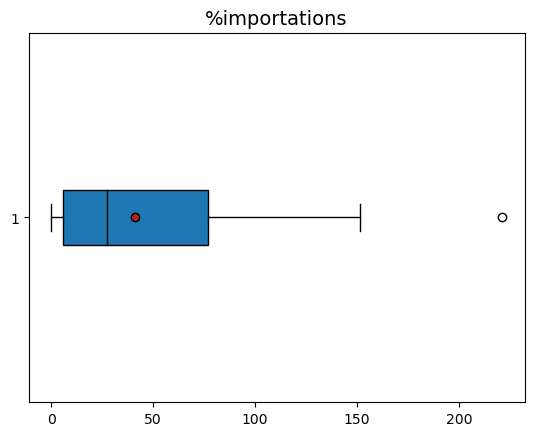

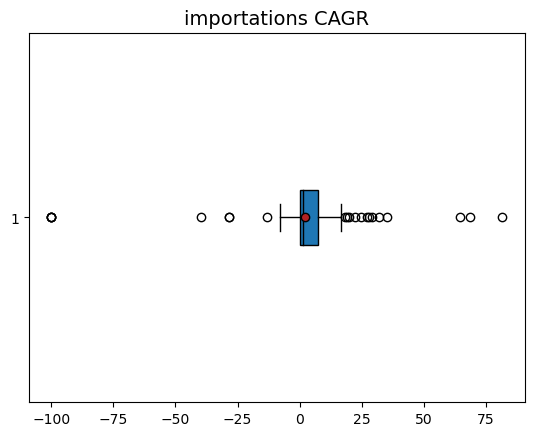

In [30]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


plt.boxplot(TableC['%importations'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('%importations', fontsize=14)
plt.show()


plt.boxplot(TableC['importations_CAGR%'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('importations CAGR', fontsize=14)


plt.show()

Plusieurs pays sont à +de100% d'importations. Il y a également des outliers dans la variables importations CAGR

### % importation

In [31]:
paystest=TableC['pays'].loc[TableC['%importations']>100].to_list()
paystest

['Belgique',
 'Lettonie',
 'Luxembourg',
 'Mauritanie',
 'Mongolie',
 'Oman',
 'Pays-Bas (Royaume des)',
 'Samoa',
 'Émirats arabes unis']

In [32]:
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(paystest)][['Zone','Disponibilité intérieure','Production']])
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(paystest)][['Zone','Importations - Quantité']])

Élément                    Zone Disponibilité intérieure                       \
Année                                               2017   2018   2019   2020   
17                     Belgique                    157.0  164.0  189.0  217.0   
88                     Lettonie                     41.0   41.0   46.0   48.0   
93                   Luxembourg                     11.0   12.0   12.0   12.0   
103                  Mauritanie                     22.0   23.0   27.0   27.0   
106                    Mongolie                      9.0   12.0   14.0   14.0   
119                        Oman                    114.0  100.0  117.0   90.0   
126      Pays-Bas (Royaume des)                    290.0  234.0  161.0  214.0   
148                       Samoa                     18.0   20.0   20.0   16.0   
181         Émirats arabes unis                    495.0  597.0  649.0  463.0   

Élément        Production                                 
Année     2021       2017    2018    2019    2020   2021  
17       206.0      463.0   470.0   448.0   448.0  452.0  
88        47.0       33.0    34.0    35.0    35.0   35.0  
93        12.0        0.0     0.0     0.0     0.0    0.0  
103       35.0        5.0     5.0     5.0     4.0    4.0  
106       18.0        0.0     0.0     0.0     1.0    0.0  
119       92.0        6.0     7.0     7.0     7.0    7.0  
126      345.0     1099.0  1074.0  1048.0  1006.0  887.0  
148       17.0        0.0     0.0     0.0     0.0    0.0  
181      460.0       57.0    47.0    45.0    54.0   56.0

Élément                    Zone Importations - Quantité                       \
Année                                              2017   2018   2019   2020   
17                     Belgique                   315.0  305.0  322.0  303.0   
88                     Lettonie                    43.0   47.0   48.0   49.0   
93                   Luxembourg                    12.0   12.0   13.0   13.0   
103                  Mauritanie                    24.0   29.0   31.0   35.0   
106                    Mongolie                    10.0   12.0   14.0   16.0   
119                        Oman                   126.0  120.0  133.0  116.0   
126      Pays-Bas (Royaume des)                   608.0  585.0  602.0  569.0   
148                       Samoa                    17.0   18.0   20.0   16.0   
181         Émirats arabes unis                   469.0  612.0  690.0  493.0   

Élément         
Année     2021  
17       312.0  
88        49.0  
93        14.0  
103       43.0  
106       20.0  
119      124.0  
126      763.0  
148       21.0  
181      529.0

Les pays qui ont un taux d'importation élevé par rapport à leur disponibilité intérieure sont des outliers mais ne sont pas aberrants car ils sont également pour la plupart fort exportateur ou peu producteur

In [33]:
TableC['%importations'].median()

27.21

### Importation CAGR

Nous cherchons d'abord à identifier ces outliers

In [34]:
# On calcul les q1 et q2 puis l'interquartile
q1 = TableC['importations_CAGR%'].quantile(0.25)
q3 = TableC['importations_CAGR%'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

In [35]:
paystest2=TableC['pays'].loc[(TableC['importations_CAGR%']>fence_high) | (TableC['importations_CAGR%']<fence_low)].to_list()

In [36]:
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(paystest2)][['Zone','Disponibilité intérieure','Production']])
display(Dispo_Alim.loc[Dispo_Alim['Zone'].isin(paystest2)][['Zone','Importations - Quantité']])

Élément                             Zone Disponibilité intérieure          \
Année                                                        2017    2018   
2                                Albanie                     33.0    27.0   
3                                Algérie                    286.0   286.0   
10                             Australie                   1245.0  1211.0   
20       Bolivie (État plurinational de)                    507.0   485.0   
30                              Cambodge                     36.0    39.0   
60                                 Ghana                    209.0   270.0   
72                             Indonésie                   2049.0  2115.0   
73        Iran (République islamique d')                   2189.0  2194.0   
85                              Kiribati                      2.0     3.0   
90                                 Libye                    185.0   250.0   
101                                Maroc                    730.0   730.0   
114                              Nigéria                    273.0   278.0   
121                          Ouzbékistan                     67.0    76.0   
122                             Pakistan                   1279.0  1392.0   
144          République-Unie de Tanzanie                     68.0    81.0   
152                         Sierra Leone                     29.0    30.0   
162                          Tadjikistan                     38.0    36.0   
170                         Turkménistan                     31.0    55.0   
171                              Turquie                   1760.0  1716.0   
176                             Viet Nam                    927.0  1070.0   
180                               Égypte                   1554.0  1709.0   

Élément                         Production                                  
Année      2019    2020    2021       2017    2018    2019    2020    2021  
2          35.0    40.0    63.0       13.0    16.0    13.0    14.0    14.0  
3         280.0   258.0   258.0      284.0   286.0   285.0   258.0   258.0  
10       1240.0  1242.0  1281.0     1271.0  1235.0  1276.0  1282.0  1327.0  
20        490.0   476.0   512.0      507.0   485.0   488.0   473.0   508.0  
30         29.0    30.0    32.0       27.0    28.0    28.0    28.0    28.0  
60        221.0   361.0   449.0       58.0    65.0    68.0    73.0    74.0  
72       3966.0  3682.0  3887.0     3218.0  3454.0  3975.0  3683.0  3889.0  
73       2147.0  2438.0  2108.0     2194.0  2243.0  2198.0  2441.0  1994.0  
85          3.0     1.0     4.0        1.0     1.0     1.0     1.0     1.0  
90        204.0   223.0   259.0      128.0   129.0   129.0   127.0   128.0  
101       848.0   639.0   649.0      745.0   775.0   842.0   635.0   640.0  
114       252.0   242.0   242.0      258.0   260.0   240.0   241.0   241.0  
121        90.0   146.0   221.0       58.0    59.0    64.0   101.0   124.0  
122      1519.0  1339.0  1485.0     1281.0  1396.0  1523.0  1662.0  1814.0  
144        48.0    88.0    96.0       65.0    79.0    42.0    82.0    88.0  
152        44.0    52.0    61.0       17.0    15.0    19.0    22.0    23.0  
162        20.0    25.0    35.0        7.0     7.0    16.0    21.0    31.0  
170        37.0    41.0    57.0       21.0    22.0    24.0    23.0    23.0  
171      1723.0  1686.0  1700.0     2192.0  2229.0  2202.0  2201.0  2302.0  
176      1332.0  1586.0  1913.0      874.0   930.0  1145.0  1319.0  1703.0  
180      1663.0  2130.0  2331.0     1429.0  1451.0  1630.0  2121.0  2309.0

Élément                             Zone Importations - Quantité         \
Année                                                       2017   2018   
2                                Albanie                    20.0   12.0   
3                                Algérie                     2.0    0.0   
10                             Australie                    16.0   16.0   
20       Bolivie (État plurinational de)                     1.0    0.0   
30                              Cambodge                    10.0   15.0   
60                                 Ghana                   151.0  205.0   
72                             Indonésie                     1.0    0.0   
73        Iran (République islamique d')                     6.0    3.0   
85                              Kiribati                     1.0    2.0   
90                                 Libye                    57.0  122.0   
101                                Maroc                     3.0    4.0   
114                              Nigéria                    16.0   18.0   
121                          Ouzbékistan                     8.0    7.0   
122                             Pakistan                     2.0    1.0   
144          République-Unie de Tanzanie                     2.0    1.0   
152                         Sierra Leone                    14.0   18.0   
162                          Tadjikistan                    38.0   14.0   
170                         Turkménistan                    10.0   31.0   
171                              Turquie                     3.0    6.0   
176                             Viet Nam                    62.0  162.0   
180                               Égypte                   133.0   46.0   

Élément                       
Année     2019   2020   2021  
2         22.0   27.0   48.0  
3          0.0    0.0    0.0  
10         9.0    2.0    3.0  
20         2.0    3.0    4.0  
30         1.0    3.0    5.0  
60       153.0  288.0  375.0  
72         0.0    0.0    0.0  
73         4.0    3.0  118.0  
85         2.0    0.0    3.0  
90        76.0   96.0  131.0  
101        7.0    5.0   10.0  
114       12.0    0.0    0.0  
121       21.0   44.0   97.0  
122        0.0    0.0    0.0  
144        6.0    6.0    9.0  
152       20.0   30.0   38.0  
162        9.0    4.0    3.0  
170       14.0   19.0   34.0  
171       44.0   45.0   41.0  
176      209.0  290.0  221.0  
180       36.0   20.0   25.0

Les fortes évolutions sur le CAGR des importations se joue : 
- soit sur des pays qui avaient une faible importation en 2017 et le moindre changement influent fortement, 
- soit de choix économique d'augmenter la production au détriment des importations

## Pib/hab

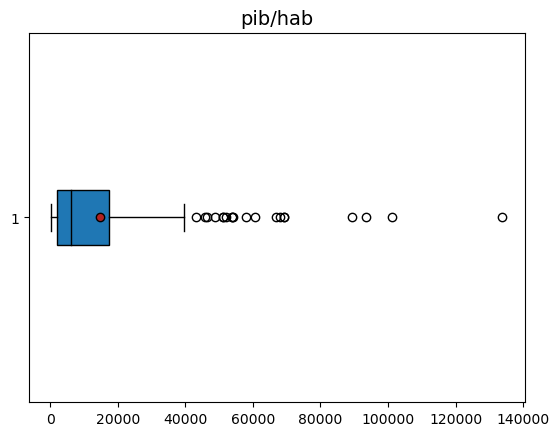

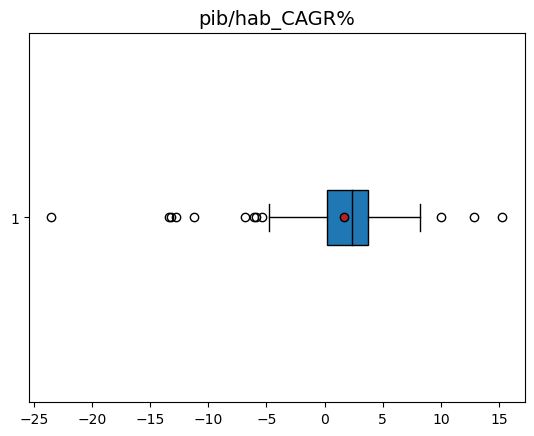

In [37]:

plt.boxplot(TableC['pib/hab'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('pib/hab', fontsize=14)
plt.show()


plt.boxplot(TableC['pib/hab_CAGR%'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('pib/hab_CAGR%', fontsize=14)
plt.show()

### pib / hab

In [38]:
TableC['pays'].loc[TableC['pib/hab']>40000]
#Pas de valeurs aberrantes, il s'agit de pays riches

4                                              Allemagne
10                                             Australie
11                                              Autriche
16                                              Belgique
30                                                Canada
45                                              Danemark
52                                              Finlande
53                                                France
72                                               Irlande
73                                               Islande
74                                                Israël
90                                            Luxembourg
109                                              Norvège
111                                     Nouvelle-Zélande
120                               Pays-Bas (Royaume des)
127    Royaume-Uni de Grande-Bretagne et d'Irlande du...
149                                               Suisse
151                            

### pib/hab cagr

In [39]:
# On calcul les q1 et q2 puis l'interquartile
q1 = TableC['pib/hab_CAGR%'].quantile(0.25)
q3 = TableC['pib/hab_CAGR%'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

In [40]:
paystest3=TableC['pays'].loc[(TableC['pib/hab_CAGR%']>fence_high) | (TableC['pib/hab_CAGR%']<fence_low)].to_list()

In [41]:
display(Pib[['Zone','Valeur US $ par habitant']].loc[Pib['Zone'].isin(paystest3)])
# Ce sont des pays qui ont connu soit des crises soit des embellies économiques

Élément                                    Zone Valeur US $ par habitant  \
Année                                                               2017   
0                                   Afghanistan               530.149831   
6                                        Angola              4042.681403   
10                                    Argentine             14609.783370   
28                                       Brésil              9896.717511   
73                                       Guyana              6220.978568   
97                                        Libye             10529.116269   
172                                      Soudan              3000.817257   
191                                     Ukraine              2510.017662   
194      Venezuela (République bolivarienne du)              8112.053374   
196                                       Yémen               612.353054   
197                                      Zambie              1495.437665   
199                                      Égypte              1917.049576   

Élément                                                         
Année            2018          2019         2020          2021  
0          502.056771    500.522664   516.866543    372.548875  
6         3240.862222   2569.629791  1639.951036   2044.218212  
10       11816.649537  10006.693111  8560.709940  10761.081627  
28        9121.020092   8883.903092  6794.515853   7507.160246  
73        6094.909837   6477.296726  6863.092395   9998.545452  
97       11838.298708  10542.429020  7039.725252   5791.254976  
172       1151.536450    812.334885   771.499620    785.577295  
191       2944.883168   3480.643241  3566.816468   4596.349175  
194       6842.328225   5183.178988  3738.051589   3965.034328  
196        866.227188    411.460368   291.679074    301.586433  
197       1475.226653   1268.213128   956.831747   1094.501613  
199       2407.453633   3004.652156  3457.211063   3898.019730

## Stabilité moyenne

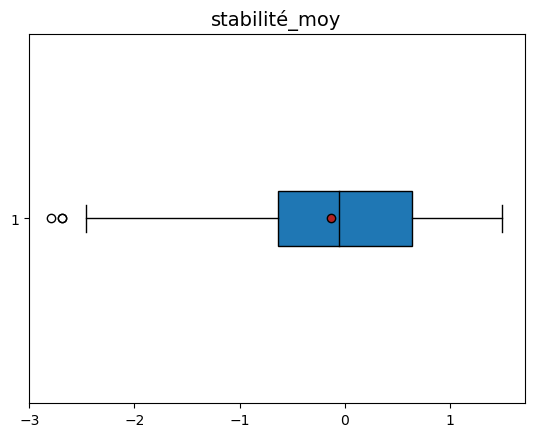

In [42]:
plt.boxplot(TableC['stabilité_moy'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('stabilité_moy', fontsize=14)
plt.show()

In [43]:
TableC[['pays','stabilité_moy']].loc[TableC['stabilité_moy']<-2]
#Il s'agit de pays qui ont connu des crises

,pays,stabilité_moy
0,Afghanistan,-2.692
71,Iraq,-2.460
87,Libye,-2.440
95,Mali,-2.136
116,Pakistan,-2.082
129,République arabe syrienne,-2.692
130,République centrafricaine,-2.132
168,Yémen,-2.792


## Population Cagr

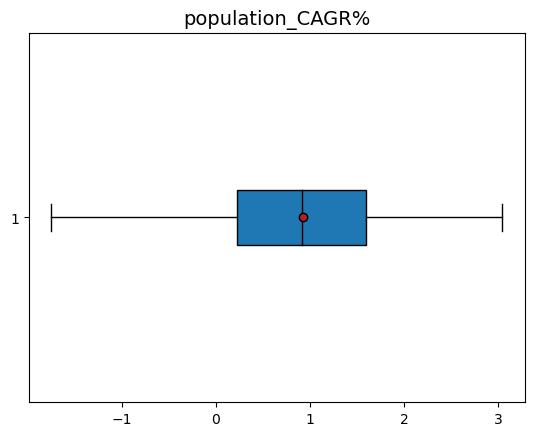

In [44]:
plt.boxplot(TableC['population_CAGR%'], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('population_CAGR%', fontsize=14)
plt.show()

## Matrice de corrélation

On peut utiliser une matrice de corrélations entre des valeurs quantitatives

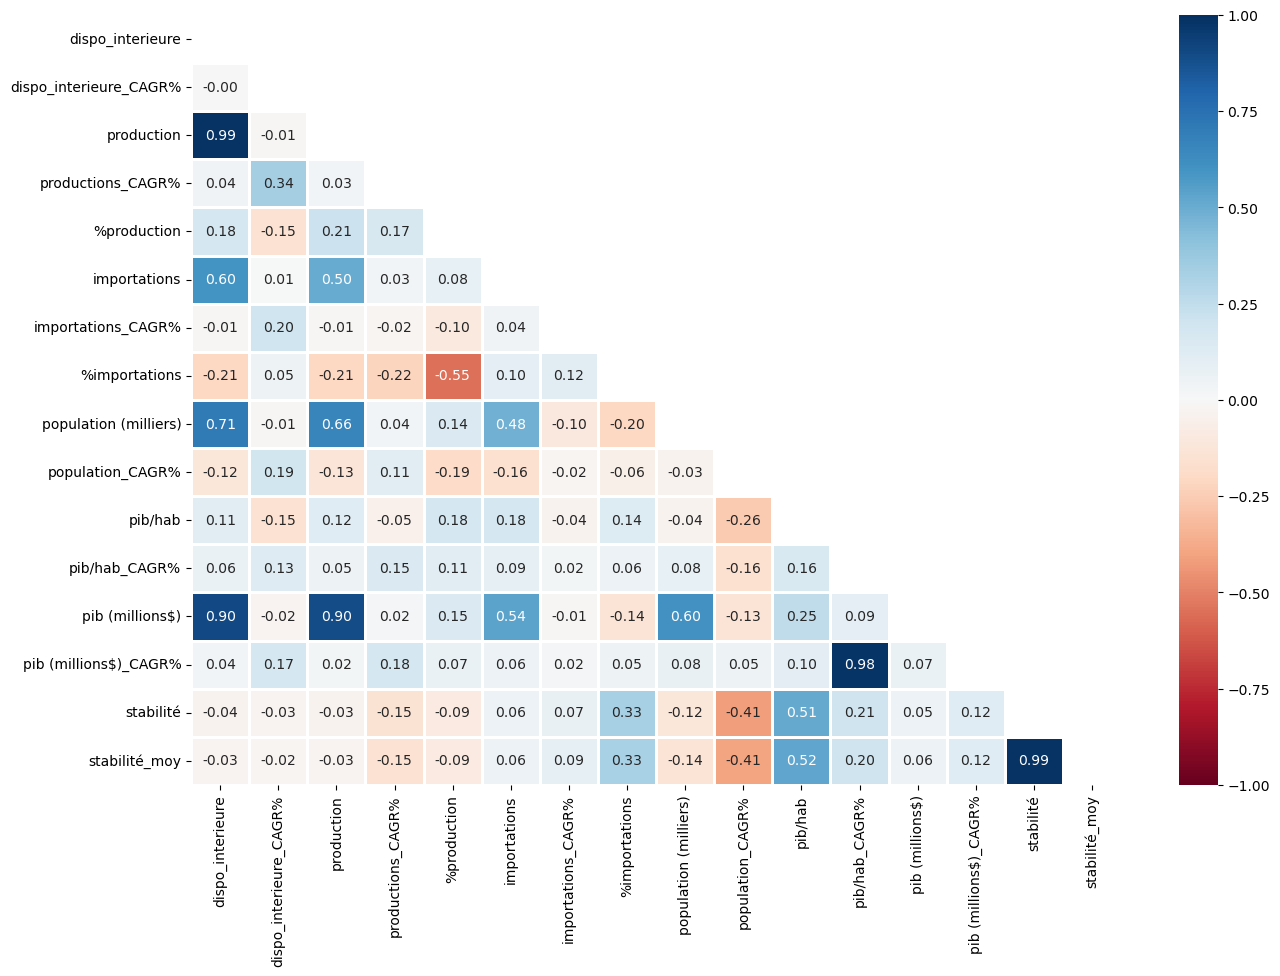

<Figure size 640x480 with 0 Axes>

In [45]:
# Calculate pairwise-correlation
corr = TableC.corr()

# corrélations
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()
plt.savefig("corr.png", dpi=300)

# Couverture de notre échantillon

In [46]:
#Calcul du % de couverture de notre échantillon de 173 pays par rapport à la population mondiale en 2021 (7,888 mrds d'habitants)

print( 'Notre échantillon couvre' ,round((TableC['population (milliers)'].sum()) / (7888*1000) *100,2), '% de la population mondiale')

Notre échantillon couvre 99.17 % de la population mondiale


# Dataframe final

In [47]:
dataset=TableC.drop(columns={'_mergeA','_mergeB','_mergeC'})
describe_df(dataset)

(173, 17)


C:\Users\boisj\AppData\Local\Temp\ipykernel_3272\3662265076.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  description['moy']=dataframe.mean()


,dtype,missing_values,unique_values,count,min,max,moy
pays,object,0,173,173,Afghanistan,Îles Salomon,NaN
dispo_interieure,float64,0,144,173,4.0,25657.0,780.641618
dispo_interieure_CAGR%,float64,0,148,173,-16.99,37.18,3.407399
production,float64,0,124,173,0.0,24618.0,795.965318
productions_CAGR%,float64,0,130,173,-100.0,37.18,1.317977
%production,float64,0,150,173,0.0,257.1,74.030116
importations,float64,0,96,173,0.0,2075.0,99.549133
importations_CAGR%,float64,0,118,173,-100.0,81.45,2.125838
%importations,float64,0,145,173,0.0,221.16,41.103237
population (milliers),float64,0,173,173,47.606,1457934.562,45216.232705


In [48]:
dataset.to_csv('dataset_P9_JPB.csv',index=False)

In [49]:
dataset.sample(10)

,pays,dispo_interieure,dispo_interieure_CAGR%,production,productions_CAGR%,%production,importations,importations_CAGR%,%importations,population (milliers),population_CAGR%,pib/hab,pib/hab_CAGR%,pib (millions$),pib (millions$)_CAGR%,stabilité,stabilité_moy
59,Grèce,274.0,9.01,239.0,-0.58,87.23,77.0,-0.51,28.10,10445.365,-0.47,20571.217936,1.94,214873.879834,1.46,0.15,0.112
158,Togo,41.0,-6.05,25.0,-8.97,60.98,16.0,0.00,39.02,8644.829,1.94,943.939354,3.02,8160.194303,5.02,-0.80,-0.882
73,Islande,11.0,0.00,9.0,-2.09,81.82,2.0,0.00,18.18,370.335,1.51,69133.134082,-0.80,25602.419210,0.70,1.37,1.430
108,Nigéria,242.0,-2.38,241.0,-1.35,99.59,0.0,-100.00,0.00,213401.323,1.98,2019.308063,0.79,430923.012150,2.78,-1.78,-1.934
74,Israël,618.0,0.39,632.0,0.10,102.27,0.0,0.00,0.00,8900.059,1.38,54111.021045,4.82,481591.279848,6.27,-1.06,-0.900
122,Pologne,1283.0,-0.67,2529.0,1.70,197.12,69.0,4.64,5.38,38307.726,-0.12,17736.419557,5.43,679441.900611,5.31,0.51,0.520
8,Argentine,2192.0,2.24,2339.0,1.59,106.71,10.0,4.56,0.46,45276.780,0.55,10761.081627,-5.93,487227.125386,-5.42,-0.11,-0.020
141,Sao Tomé-et-Principe,5.0,20.11,1.0,0.00,20.00,4.0,14.87,80.00,223.107,1.41,2485.817552,6.44,554.603297,7.93,0.60,0.464
118,Papouasie-Nouvelle-Guinée,40.0,5.23,7.0,0.00,17.50,34.0,7.21,85.00,9949.437,1.77,2672.967174,1.39,26594.518500,3.18,-0.58,-0.672
43,Cuba,371.0,2.62,18.0,-9.10,4.85,359.0,2.85,96.77,11256.372,-0.14,11255.278950,5.67,126693.606820,5.52,0.43,0.584


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 176
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pays                    173 non-null    object 
 1   dispo_interieure        173 non-null    float64
 2   dispo_interieure_CAGR%  173 non-null    float64
 3   production              173 non-null    float64
 4   productions_CAGR%       173 non-null    float64
 5   %production             173 non-null    float64
 6   importations            173 non-null    float64
 7   importations_CAGR%      173 non-null    float64
 8   %importations           173 non-null    float64
 9   population (milliers)   173 non-null    float64
 10  population_CAGR%        173 non-null    float64
 11  pib/hab                 173 non-null    float64
 12  pib/hab_CAGR%           173 non-null    float64
 13  pib (millions$)         173 non-null    float64
 14  pib (millions$)_CAGR%   173 non-null    fl